# **K Nearest Neighbours**
The K-Nearest Neighbors (KNN) algorithm is a simple, supervised machine learning method for classification or regression, working by finding the "k" closest data points (neighbors) to a new point and assigning it the most common class (classification) or average value (regression) among them

## How it works

For every new point, we calculate the distance *(Euclidean or Manhattan distance)* of the point with the other points. Then we take the **k** nearest of them, i.e., the **k** points that have the least distance.

#### Euclidean and Manhattan distances
For two points (x₁, y₁) and (x₂, y₂)

The euclidean distance is:
$$ \sqrt{(x₁ - x₂)² - (y₁ - y₂)²} $$

The manhattan distance is:
$$ |x₁ - x₂| + |y₁ - y₂| $$

After taking those **k** points,
- **In classification problem**\
See the majority classes among those **k** elements and that class will be resultant prediction of the new point.

- **In regression problem**\
Take the average of all the **k** values and that will be resultant prediction of the new point.

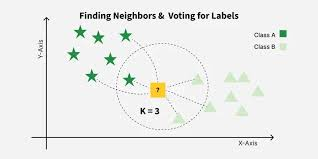

## Optimisation of KNN
For every new point, if we go and calculate distance with every point then the time complexity will be $ O(n) $, which can be manageable if low number of points are there. But usually we don't have this situation in real life, we can have millions of data and there we can't afford to go with linear time complexity, That's why we have **KD tree** and **Ball tree**.

- ***KD Tree***\
A KD Tree splits your data into boxes. It looks at one feature at a time (like height, then weight) and cuts the data in half. This creates a "map" that helps the computer quickly find nearby points without checking everyone. It works great for simple data with few features.
- ***Ball Tree***\
A Ball Tree organizes data into circles (or spheres) instead of boxes. Each circle has a center and a radius. When searching, if a circle is too far away, the computer skips everyone inside it entirely. This "skipping" makes it much faster than a KD Tree for complex, high-dimensional data.

## Implementation of KNN Classifier

In [395]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification

In [396]:
# make a data set
X, y = make_classification(n_classes=3, n_features=10, n_samples=1000, n_clusters_per_class=1, n_informative=6, random_state=42)

In [397]:
# split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<Axes: xlabel='0', ylabel='1'>

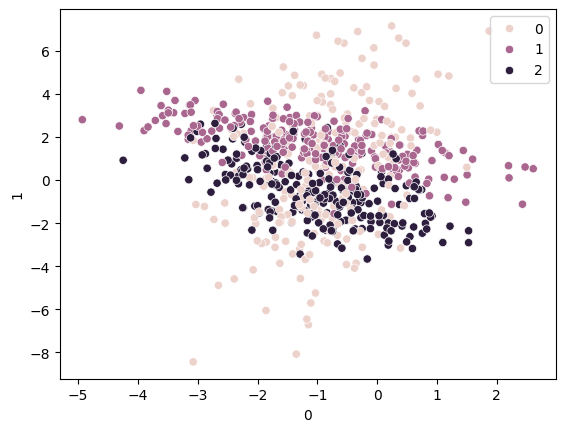

In [398]:
sns.scatterplot(x=pd.DataFrame(X_train)[0], y=pd.DataFrame(X_train)[1], hue=y_train)

In [399]:
# train model
from sklearn.neighbors import KNeighborsClassifier
knn_classify = KNeighborsClassifier(n_neighbors=10, algorithm='auto')
knn_classify.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [400]:
# predict for new data
y_pred = knn_classify.predict(X_test)
y_pred

array([0, 0, 2, 0, 1, 1, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 2, 1, 0, 2, 1,
       0, 1, 2, 1, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 1, 0, 0, 1, 2, 0, 2,
       2, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1,
       1, 2, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1, 2, 0, 0, 1, 0, 2, 0, 2, 0, 0,
       2, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       2, 1, 1, 0, 1, 1, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 1, 1, 0, 2, 1, 0, 1, 2, 2, 2, 0, 1, 0,
       0, 1, 0, 2, 1, 0, 0, 2, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 0,
       2, 2, 2, 2, 1, 1, 0, 1, 0, 2, 1, 2, 0, 0, 1, 0, 1, 1, 2, 0, 0, 2,
       0, 1, 1, 1, 0, 2, 0, 1, 0, 2, 2, 0, 0, 0, 2, 0, 1, 2, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 1, 1,
       0, 2, 2, 1, 1, 1, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 2, 1, 0, 0, 1, 2,
       1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 1, 0, 0, 2, 0, 1, 0, 0, 2, 2, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 2, 2, 2, 1])

In [401]:
# check accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_pred=y_pred, y_true=y_test))
print(confusion_matrix(y_pred=y_pred, y_true=y_test))
print(classification_report(y_pred=y_pred, y_true=y_test))

0.9566666666666667
[[111   1   0]
 [  7  93   1]
 [  0   4  83]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       112
           1       0.95      0.92      0.93       101
           2       0.99      0.95      0.97        87

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



## Implementation of KNN regression

In [402]:
# get the data
data = pd.read_csv("../data/height-weight.csv")
X, y = data['Weight'], data['Height']
X = np.array(X).reshape(len(X), 1)

<Axes: xlabel='0', ylabel='Height'>

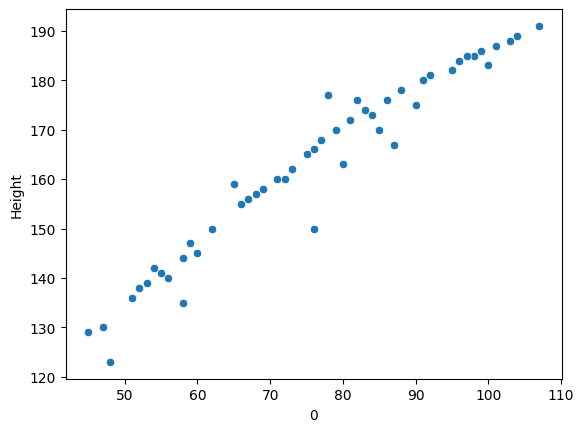

In [403]:
# split and visualise the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
sns.scatterplot(x=pd.DataFrame(X)[0], y=y_train)

In [404]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=6, algorithm='auto')

In [405]:
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [406]:
# make predictions
y_pred = knn_reg.predict(X_test)
y_pred

array([187.33333333, 134.66666667, 158.83333333, 165.66666667,
       153.66666667, 180.66666667, 161.83333333, 165.66666667,
       176.16666667, 187.33333333, 142.        , 186.33333333,
       187.33333333, 132.5       , 146.66666667, 152.        ,
       132.5       ])

In [407]:
# check for accuracy
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(mean_squared_error(y_true=y_test, y_pred=y_pred))
print(mean_absolute_error(y_true=y_test, y_pred=y_pred))
print(r2_score(y_true=y_test, y_pred=y_pred))

24.687908496732035
3.539215686274509
0.9402274889369204
